## Demonstration of Univariate Linear Regression

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook demonstrates the application of univariate linear regression to estimate the parameters of a one-dimensional predictor model from a set of examples.

In [1]:
library(ggplot2)

### Generate Dataset

In the following, a synthetic dataset with $N$ examples is generated by implementing a simple linear relationship and additive noise.

In [2]:
N <- 200
alpha = 1.2
theta = .1

set.seed(123)
X <- runif(N, min = -5, max = 10)
Y <- alpha + theta * X + .1 * rnorm(N)

The data points are plotted in order to investigate the structure of the dataset. The linear relation ship becomes clearly visible.

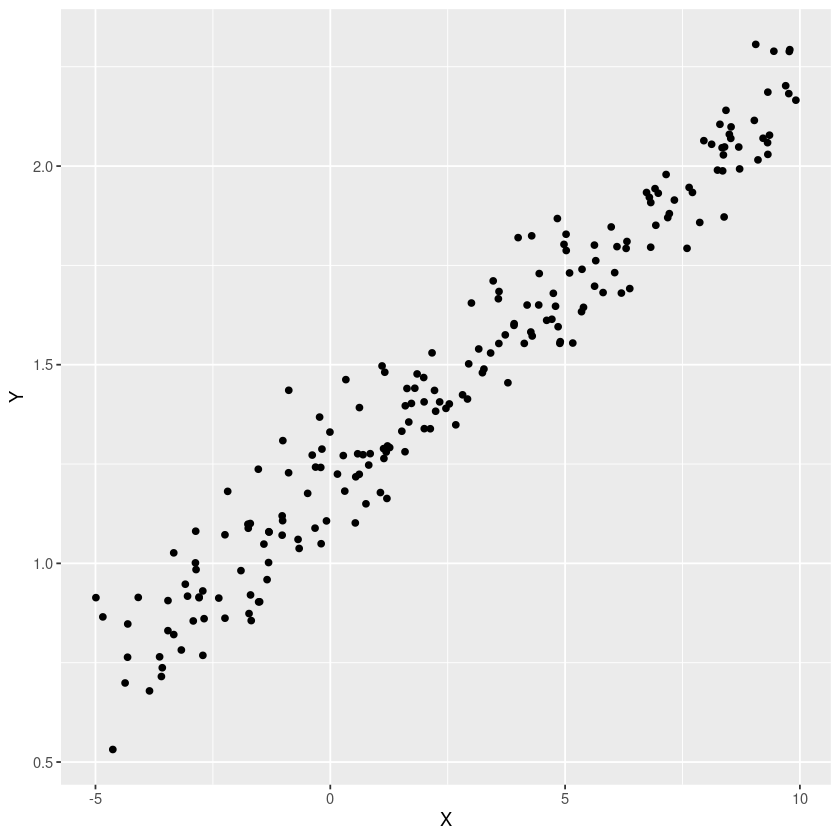

In [3]:
qplot(X,Y)

### Estimate Parameters of Linear Regression

The parameters of the linear model are estimated by performing a linear regression. First the data matrix is extended in order to incorporate the intercept in the model.

In [4]:
Xt <- as.matrix(data.frame(1, X))
theta_hat <- solve(t(Xt) %*% Xt) %*% t(Xt) %*% Y

Comparison of the estimated and true parameters reveals that the regression was able to determine the parameters with a quite high accuracy 

In [5]:
print(sprintf('Estimated/true intercept: %1.3f / %1.3f', theta_hat[1], alpha))
print(sprintf('Estimated/true slope: %1.3f / %1.3f', theta_hat[2], theta))

[1] "Estimated/true intercept: 1.203 / 1.200"
[1] "Estimated/true slope: 0.099 / 0.100"


A common visualization of linear regression is to show the data points together with the estimated line predictor illustrated by a (regression) line. Note, points on the regression line constitute the output $\hat{y}$ of the linear predictor for a given $x$.

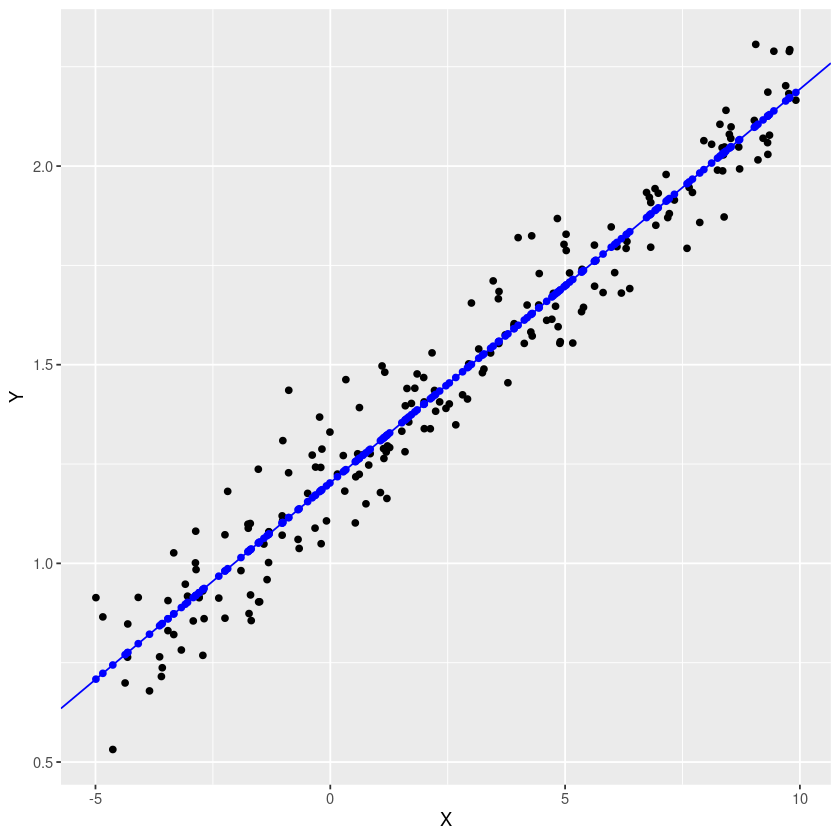

In [6]:
Y_hat <- Xt %*% theta_hat

qplot(X,Y) + 
  geom_abline(slope=theta_hat[2], intercept = theta_hat[1], color='blue') + 
  geom_point(aes(X,Y_hat), color='blue')

### Evaluation

Various measures are used to evaluate the performance of linear regression. The most common ones are demonstrated in the following.

#### Residuals Plot

The statistical properties of the residual error $e = y_n - \hat{y}_n$ provide insights into the validity of the linear model and if the underlying assumptions are met. Lets first plot the residual error, together with its mean $\mu_e$ and standard deviation $\sigma_e$. Inspection of the plot reveals that the error is mean free and the spread of the values is approximately constant over the feature $x$. 

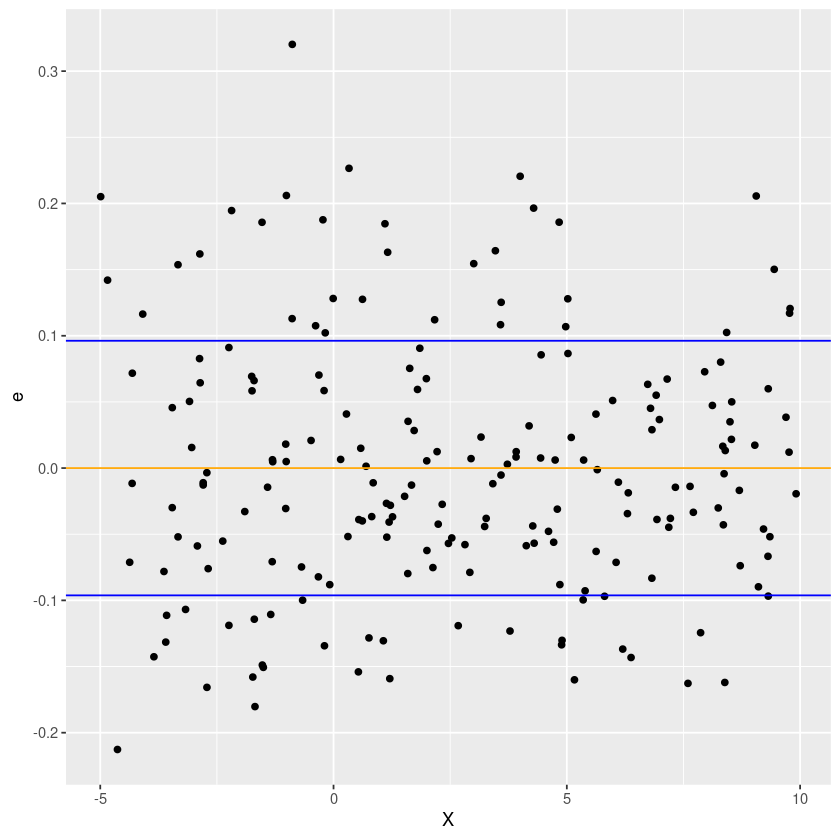

In [7]:
e = Y-Y_hat
qplot(X, e) + 
    geom_hline(yintercept = mean(e), color='orange') + 
    geom_hline(yintercept = c(-sd(e),sd(e)), color='blue')

    
#### Performance Metrics

The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$ is a common measure for the goodness-of-fit of an estimated model. Is bases on the total sum-of-squares and the residual sum-of-squares.

In [8]:
TSS = sum((Y - mean(Y))^2)
RSS = sum((Y-Y_hat)^2)
Rs = 1 - RSS/TSS

print(sprintf('Total sum-of-squares (TSS):     %1.5f',TSS))
print(sprintf('Residual sum-of-squares (RSS):  %1.5f', RSS))
print(sprintf('Coefficient of determination:   %1.5f', Rs))

[1] "Total sum-of-squares (TSS):     34.83644"
[1] "Residual sum-of-squares (RSS):  1.84203"
[1] "Coefficient of determination:   0.94712"


**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.